# Breast Cancer Detection Using Support Vector Machine

---

## Dataset Overview

The **Breast Cancer Detection Dataset** (e.g., Wisconsin Breast Cancer Dataset) contains features extracted from digitized images of breast tissue samples. It is used to classify tumors as:

- **Malignant (cancerous)**
- **Benign (non-cancerous)**

### Common Features:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Symmetry
- Fractal dimension
- etc

Each feature describes physical characteristics of the cell nuclei in the tumor samples.

---


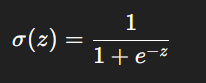

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
encoded = l.fit_transform(df['diagnosis'])

In [11]:
df['diagnosis']=encoded

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
for i,c in enumerate(l.classes_):
    print(f"{c}->{i}")

B->0
M->1


In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Standardize the features

We are gonna standardize the features that are not within 0 and 1

In [16]:
from sklearn.preprocessing import StandardScaler

# Select only float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the float columns
df[float_cols] = scaler.fit_transform(df[float_cols])


In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


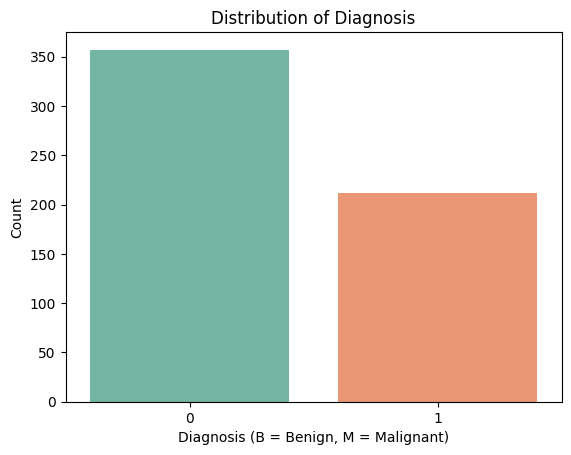

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='diagnosis', data=df, palette='Set2')

plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()


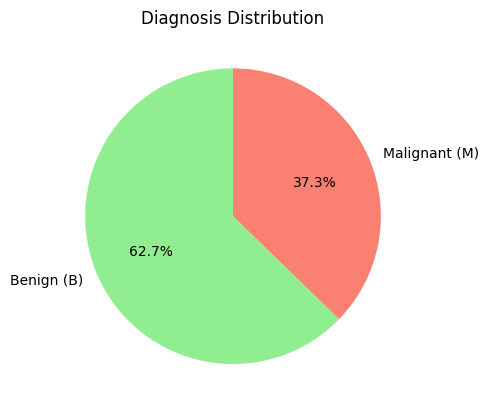

<Figure size 640x480 with 0 Axes>

In [19]:
# Pie chart
df['diagnosis'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    labels=['Benign (B)', 'Malignant (M)']
)

plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()
plt.savefig("distrib.png")


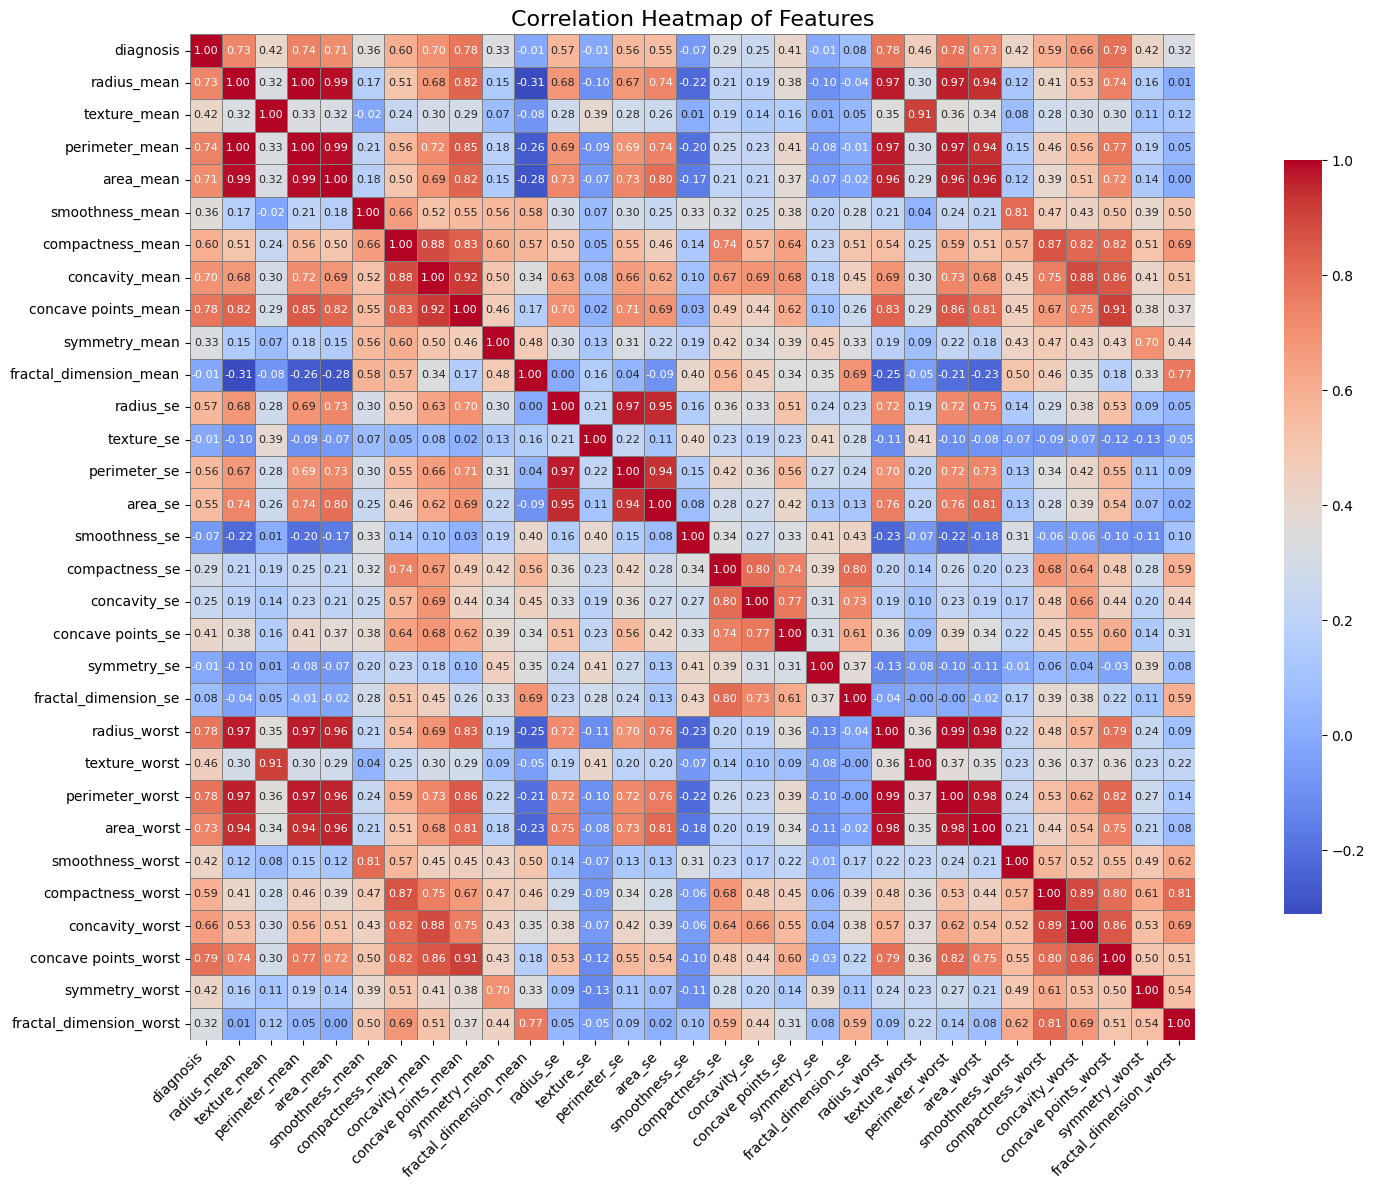

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))  # Set figure size

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",           # Color gradient from blue to red
    linewidths=0.5,            # Line between cells
    linecolor='gray',
    square=True,               # Make cells square
    cbar_kws={"shrink": 0.75}, # Shrink color bar
    annot_kws={"size": 8}      # Annotation font size
)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("corrmap.jpg")
plt.show()



## Analysis of the correlation heatmap

We see from the heatmap that there are many features which are correlated and not any correlation that is near perfect positive correlation.. 

Now it will be very time consuming for us to do the feature selection by ourselves,if we want we can do it.For exampe radius is correlated with area as radius is used in the calculation area .. But we are gonna use L1 regularized logistic regression,What L1 regularization does is it shrinks coefficents of some features to zero hence doing feature selection.

## SVM Classifier with linear kernel

In [21]:
from sklearn.svm import SVC
svl = SVC(kernel='linear')
svr = SVC(kernel='rbf')


In [22]:
X,y = df.drop("diagnosis",axis=1),df['diagnosis']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [25]:
X_test.shape,y_test.shape

((114, 30), (114,))

## Training the Model

In [26]:
svl.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVC()

## Evaluation Metrics

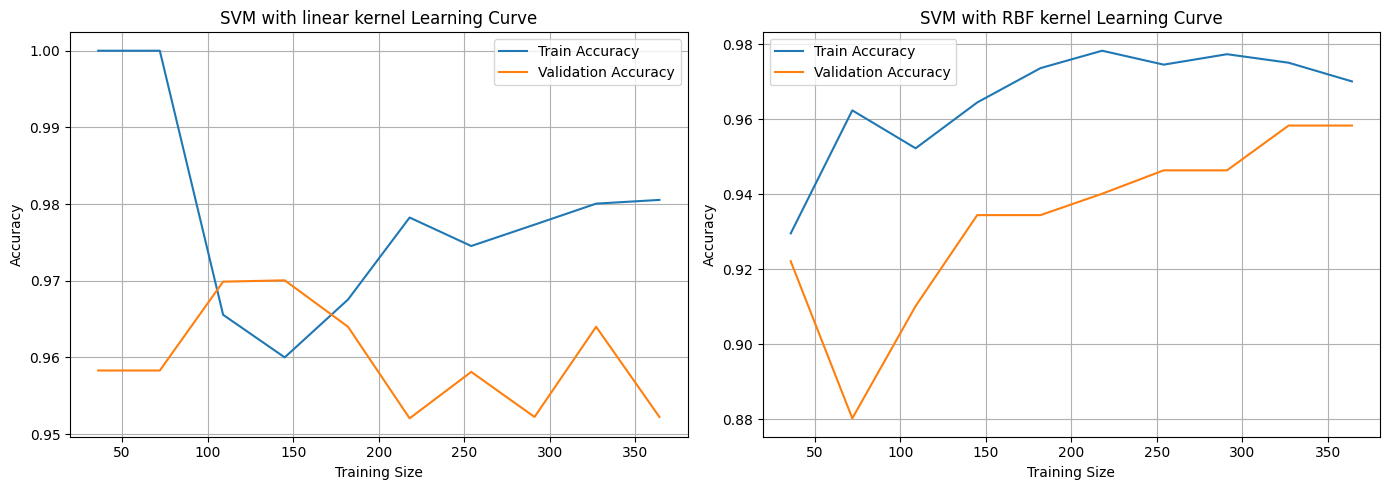

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
svl1 = SVC(kernel='linear')
svr1= SVC(kernel='rbf')

def plot_learning_curve(model, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Train Accuracy')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_learning_curve(svl1, "SVM with linear kernel Learning Curve")

plt.subplot(1, 2, 2)
plot_learning_curve(svr1, "SVM with RBF kernel Learning Curve")

plt.tight_layout()
plt.savefig("learning_curves.png", dpi=300)
plt.show()

### Classification Report

In [28]:
from sklearn.metrics import classification_report
print("Train Report SVM with linear kernel:\n",classification_report(y_train,svl.predict(X_train)))

print("Train Report SVM with rbf kernel:\n",classification_report(y_train,svr.predict(X_train)))

Train Report SVM with linear kernel:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       288
           1       1.00      0.98      0.99       167

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Train Report SVM with rbf kernel:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       288
           1       1.00      0.97      0.98       167

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [29]:
from sklearn.metrics import classification_report
print("Test Report SVM with linear kernel:\n",classification_report(y_test,svl.predict(X_test)))

print("Test Report SVM with rbf:\n",classification_report(y_test,svr.predict(X_test)))

Test Report SVM with linear kernel:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        69
           1       0.92      0.98      0.95        45

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Test Report SVM with rbf:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



### Checking Cross Val Score

In [30]:
from sklearn.model_selection import cross_val_score
svl2 = SVC(kernel='linear')
svr2= SVC(kernel='rbf')

scoresla = cross_val_score(svl2, X, y, cv=5, scoring='accuracy')  # 5-fold CV
print("Report Of SVM WITH LINEAR KERNEL\n")
print("Cross-validation accuracy scores:", scoresla)
print("Mean CV accuracy:", scoresla.mean())
print("Standard deviation:", scoresla.std())

scoresra = cross_val_score(svr2, X, y, cv=5, scoring='accuracy')  # 5-fold CV
print("Report Of SVM WITH RBF KERNEL\n")

print("Cross-validation accuracy scores:", scoresra)
print("Mean CV accuracy:", scoresra.mean())
print("Standard deviation:", scoresra.std())



Report Of SVM WITH LINEAR KERNEL

Cross-validation accuracy scores: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
Mean CV accuracy: 0.9701443875174661
Standard deviation: 0.010490210803241348
Report Of SVM WITH RBF KERNEL

Cross-validation accuracy scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV accuracy: 0.9736376339077782
Standard deviation: 0.014678541667933545


In [31]:
from sklearn.model_selection import cross_val_score
svl2 = SVC(kernel='linear')
svr2= SVC(kernel='rbf')

scoreslp = cross_val_score(svl2, X, y, cv=5, scoring='precision')  # 5-fold CV
print("Report Of SVM WITH LINEAR KERNEL\n")
print("Cross-validation precision scores:", scoreslp)
print("Mean CV precision:", scoreslp.mean())
print("Standard deviation:", scoreslp.std())

scoresrp = cross_val_score(svr2, X, y, cv=5, scoring='precision')  # 5-fold CV
print("Report Of SVM WITH RBF KERNEL\n")

print("Cross-validation precision scores:", scoresrp)
print("Mean CV precision:", scoresrp.mean())
print("Standard deviation:", scoresrp.std())

Report Of SVM WITH LINEAR KERNEL

Cross-validation precision scores: [0.93181818 1.         1.         0.975      0.97619048]
Mean CV precision: 0.9766017316017315
Standard deviation: 0.024912883953600275
Report Of SVM WITH RBF KERNEL

Cross-validation precision scores: [0.95454545 0.975      1.         0.975      0.95348837]
Mean CV precision: 0.9716067653276956
Standard deviation: 0.01702097739410777


In [32]:
from sklearn.model_selection import cross_val_score
svl2 = SVC(kernel='linear')
svr2= SVC(kernel='rbf')

scoreslr = cross_val_score(svl2, X, y, cv=5, scoring='recall')  # 5-fold CV
print("Report Of SVM WITH LINEAR KERNEL\n")
print("Cross-validation recall scores:", scoreslr)
print("Mean CV recall:", scoreslr.mean())
print("Standard deviation:", scoreslr.std())

scoresrr = cross_val_score(svr2, X, y, cv=5, scoring='recall')  # 5-fold CV
print("Report Of SVM WITH RBF KERNEL\n")

print("Cross-validation recall scores:", scoresrr)
print("Mean CV recall:", scoresrr.mean())
print("Standard deviation:", scoresrr.std())

Report Of SVM WITH LINEAR KERNEL

Cross-validation recall scores: [0.95348837 0.95348837 0.9047619  0.92857143 0.97619048]
Mean CV recall: 0.9433001107419713
Standard deviation: 0.0244601916455852
Report Of SVM WITH RBF KERNEL

Cross-validation recall scores: [0.97674419 0.90697674 1.         0.92857143 0.97619048]
Mean CV recall: 0.9576965669988926
Standard deviation: 0.034395322434407814


In [34]:
from sklearn.model_selection import cross_val_score
svl2 = SVC(kernel='linear')
svr2= SVC(kernel='rbf')

scoreslf = cross_val_score(svl2, X, y, cv=5, scoring='f1')  # 5-fold CV
print("Report Of SVM WITH LINEAR KERNEL\n")
print("Cross-validation f1:", scoreslf)
print("Mean CV f1:", scoreslf.mean())
print("Standard deviation:", scoreslf.std())

scoresrf = cross_val_score(svr2, X, y, cv=5, scoring='f1')  # 5-fold CV
print("Report Of SVM WITH RBF KERNEL\n")

print("Cross-validation f1 scores:", scoresrf)
print("Mean CV f1:", scoresrf.mean())
print("Standard deviation:", scoresrf.std())

Report Of SVM WITH LINEAR KERNEL

Cross-validation f1: [0.94252874 0.97619048 0.95       0.95121951 0.97619048]
Mean CV f1: 0.9592258400416517
Standard deviation: 0.014167628348068232
Report Of SVM WITH RBF KERNEL

Cross-validation f1 scores: [0.96551724 0.93975904 1.         0.95121951 0.96470588]
Mean CV f1: 0.9642403344143904
Standard deviation: 0.020245872099349426


### Confusion Matrix

Confusion Matrix for SVM with linear kernel


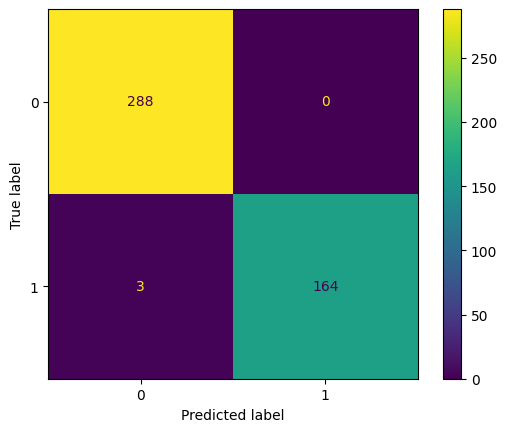

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print('Confusion Matrix for SVM with linear kernel')
cm = confusion_matrix(y_train, svl.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()  # This will plot the confusion matrix


Confusion Matrix for SVM with rbf kernel


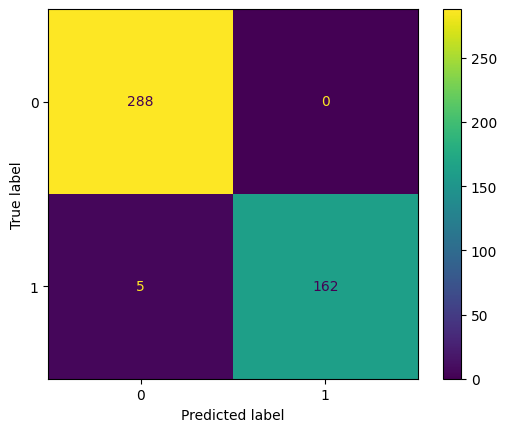

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion Matrix for SVM with rbf kernel')
cm = confusion_matrix(y_train, svr.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()  # This will plot the confusion matrix


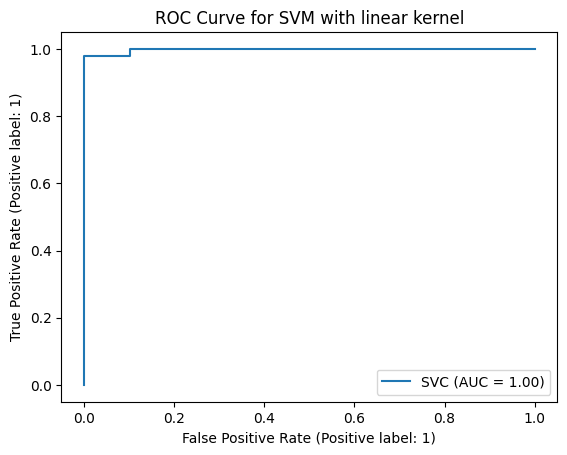

In [37]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Suppose you have a trained classifier 'clf', and test data X_test, y_test

RocCurveDisplay.from_estimator(svl, X_test, y_test)
plt.title("ROC Curve for SVM with linear kernel")
plt.show()


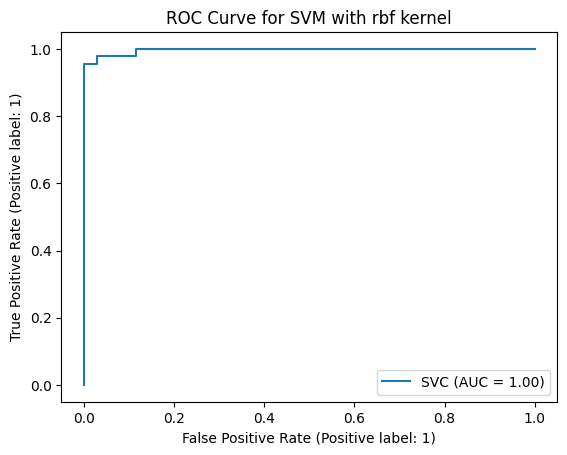

In [38]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Suppose you have a trained classifier 'clf', and test data X_test, y_test

RocCurveDisplay.from_estimator(svr, X_test, y_test)
plt.title("ROC Curve for SVM with rbf kernel")
plt.show()


## Plotting Decision Boundary Using Correlated features

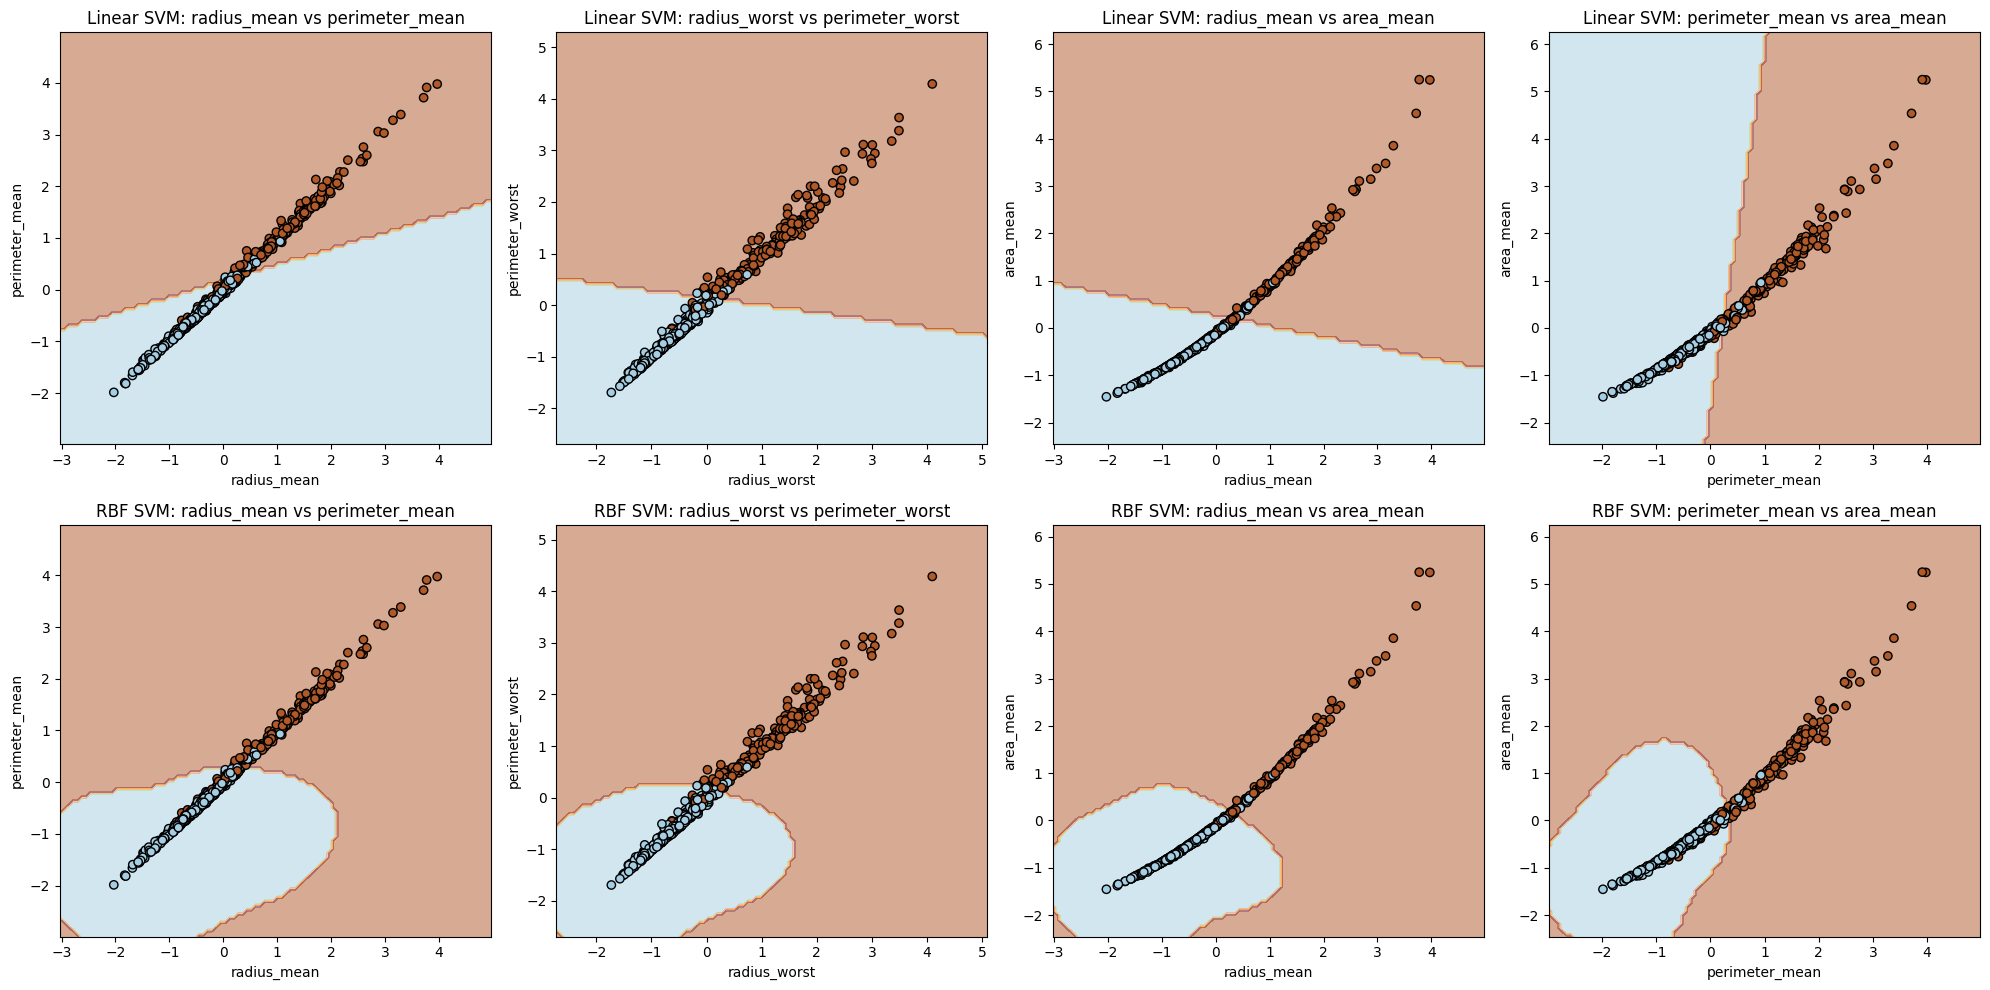

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns


# Compute correlation matrix
corr_matrix = df.corr().abs()

# Select top feature pairs (excluding the target 'diagnosis')
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
top_pairs = (
    upper.stack()
    .sort_values(ascending=False)
    .dropna()
    .head(4)
    .index.tolist()
)

# Prepare plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
scaler = StandardScaler()

for idx, (feat1, feat2) in enumerate(top_pairs):
    X = df[[feat1, feat2]].values
    y = df['diagnosis'].values
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Linear SVM
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train, y_train)

    ax1 = axes[0, idx]
    disp1 = DecisionBoundaryDisplay.from_estimator(
        svm_linear, X_scaled, response_method='predict', cmap=plt.cm.Paired, alpha=0.5, ax=ax1
    )
    ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax1.set_title(f'Linear SVM: {feat1} vs {feat2}')
    ax1.set_xlabel(feat1)
    ax1.set_ylabel(feat2)

    # RBF SVM
    svm_rbf = SVC(kernel='rbf', gamma='auto')
    svm_rbf.fit(X_train, y_train)

    ax2 = axes[1, idx]
    disp2 = DecisionBoundaryDisplay.from_estimator(
        svm_rbf, X_scaled, response_method='predict', cmap=plt.cm.Paired, alpha=0.5, ax=ax2
    )
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax2.set_title(f'RBF SVM: {feat1} vs {feat2}')
    ax2.set_xlabel(feat1)
    ax2.set_ylabel(feat2)

plt.tight_layout()
plt.show()


## Plotting Decision Boundary using PCA dimensions

In [68]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)
X,y = df.drop("diagnosis",axis=1),df['diagnosis']
X_new = p.fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=2)

In [70]:
svl_p = SVC(kernel='linear')
svr_p = SVC(kernel='rbf')
svl_p.fit(X_train,y_train)
svr_p.fit(X_train,y_train)

SVC()

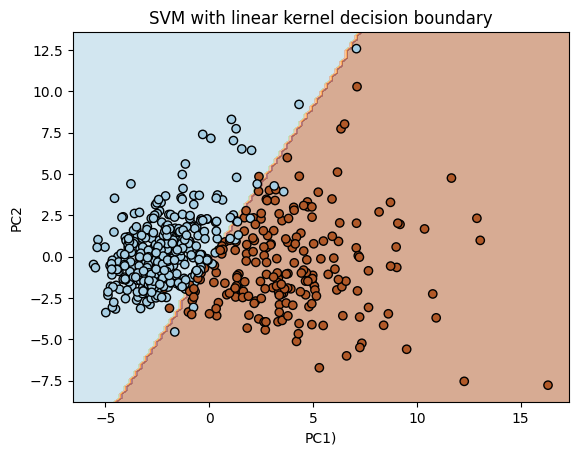

In [72]:
disp = DecisionBoundaryDisplay.from_estimator(
    svl_p, X_new, response_method='predict', cmap=plt.cm.Paired, alpha=0.5
)

# Overlay data points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('PC1)')
plt.ylabel('PC2')
plt.title('SVM with linear kernel decision boundary')
plt.savefig('linear.png')
plt.show()

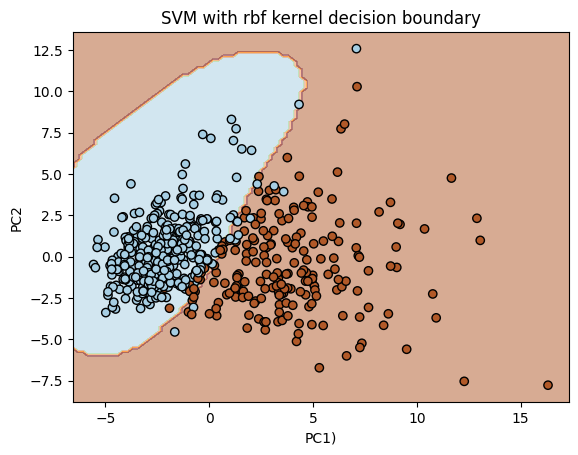

In [73]:
disp = DecisionBoundaryDisplay.from_estimator(
    svr_p, X_new, response_method='predict', cmap=plt.cm.Paired, alpha=0.5
)

# Overlay data points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('PC1)')
plt.ylabel('PC2')
plt.title('SVM with rbf kernel decision boundary')
plt.savefig('rbf.png')
plt.show()

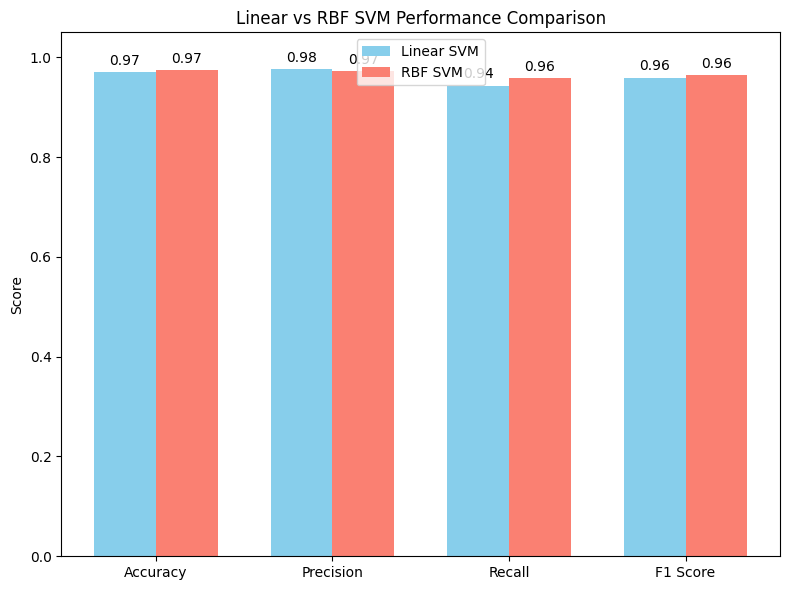

In [42]:
import matplotlib.pyplot as plt
import numpy as np



# Labels and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
linear_scores = [np.mean(scoresla), np.mean(scoreslp), np.mean(scoreslr), np.mean(scoreslf)]
rbf_scores = [np.mean(scoresra), np.mean(scoresrp), np.mean(scoresrr), np.mean(scoresrf)]

x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, linear_scores, width, label='Linear SVM', color='skyblue')
bars2 = ax.bar(x + width/2, rbf_scores, width, label='RBF SVM', color='salmon')

# Labels
ax.set_ylabel('Score')
ax.set_title('Linear vs RBF SVM Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()

# Add score labels on top
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('performance.png')
plt.show()


Since this a breast cancer dataset we are interested in increasing TPR i.e recall so rbf kernel has better recall than linear. so we will go with rbf kernel..

## Hyper Parameter tuning

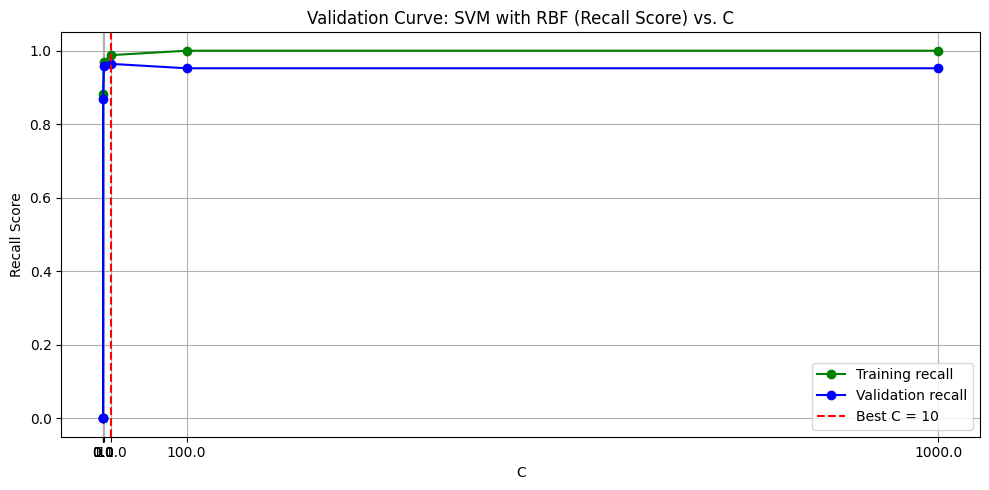

In [48]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define range of k values
C_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Compute validation curve
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'),
    X_train,
    y_train,
    param_name='C',
    param_range=C_val,
    scoring='recall',
    cv=5
)

# Calculate mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
best_k = C_val[np.argmax(test_mean)]
best_score = max(test_mean)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(C_val, train_mean, marker='o', label='Training recall', color='green')
plt.plot(C_val, test_mean, marker='o', label='Validation recall', color='blue')
plt.axvline(x=best_k, linestyle='--', color='red', label=f'Best C = {best_k}')
plt.title("Validation Curve: SVM with RBF (Recall Score) vs. C")
plt.xlabel("C")
plt.ylabel("Recall Score")  
plt.legend()
plt.grid(True)
plt.xticks(C_val)
plt.tight_layout()
plt.show()

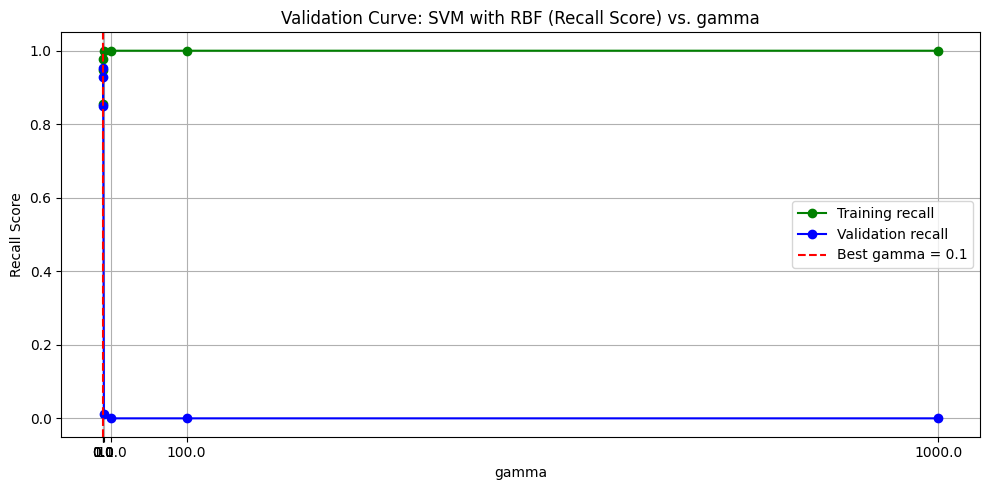

In [55]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define range of k values
g_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Compute validation curve
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'),
    X_train,
    y_train,
    param_name='gamma',
    param_range=g_val,
    scoring='recall',
    cv=5
)

# Calculate mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
best_g= g_val[np.argmax(test_mean)]
best_score_g = max(test_mean)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(g_val, train_mean, marker='o', label='Training recall', color='green')
plt.plot(g_val, test_mean, marker='o', label='Validation recall', color='blue')
plt.axvline(x=best_g, linestyle='--', color='red', label=f'Best gamma = {best_g}')
plt.title("Validation Curve: SVM with RBF (Recall Score) vs. gamma")
plt.xlabel("gamma")
plt.ylabel("Recall Score")  
plt.legend()
plt.grid(True)
plt.xticks(g_val)
plt.tight_layout()
plt.show()

In [50]:
best_g

0.1

In [51]:
best_k

10

### Best G with best K

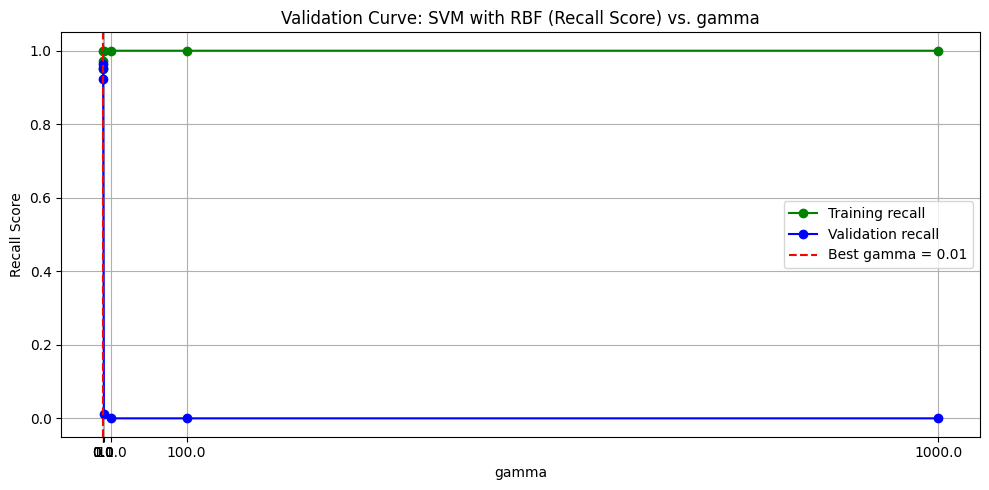

In [56]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define range of k values
g_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Compute validation curve
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf',C=best_k),
    X_train,
    y_train,
    param_name='gamma',
    param_range=g_val,
    scoring='recall',
    cv=5
)
# Calculate mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
best_gk= g_val[np.argmax(test_mean)]
best_score_gk = max(test_mean)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(g_val, train_mean, marker='o', label='Training recall', color='green')
plt.plot(g_val, test_mean, marker='o', label='Validation recall', color='blue')
plt.axvline(x=best_gk, linestyle='--', color='red', label=f'Best gamma = {best_gk}')
plt.title("Validation Curve: SVM with RBF (Recall Score) vs. gamma")
plt.xlabel("gamma")
plt.ylabel("Recall Score")  
plt.legend()
plt.grid(True)
plt.xticks(g_val)
plt.tight_layout()
plt.show()

In [54]:
best_gk

0.01

### Grid Search CV for best values of gamma and C TOGETHER

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['rbf']  # Use RBF kernel
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='recall', verbose=2)
grid.fit(X_train, y_train)

print(f"Best C: {grid.best_params_['C']}, Best gamma: {grid.best_params_['gamma']}")

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.

## 🔚 Conclusion

In this project, we evaluated Support Vector Machine (SVM) models using different kernel functions on the Breast Cancer dataset. After analyzing the performance based on key metrics such as **Accuracy**, **Precision**, **Recall**, and **F1 Score**, the **RBF (Radial Basis Function) kernel** demonstrated the best overall performance.

### 📌 Key Findings

- ✅ **RBF kernel outperformed the Linear kernel**, especially in terms of **Recall**, which is crucial in medical diagnostics to reduce false negatives.
- 🧪 Hyperparameter tuning was conducted using `GridSearchCV` to find the optimal values for `C` and `gamma`.

### 🔧 Best Hyperparameters (from Grid Search)

- **Best C**: `10`
- **Best gamma**: `0.01`

These tuned hyperparameters enabled the SVM with RBF kernel to achieve a strong balance between decision boundary complexity and classification accuracy, making it a robust model for cancer detection tasks.
